In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df = data

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
# Format the column names and make them consistent (lower case and space with underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes =='object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
# Adjust certain columns to the expected data type
df['totalcharges'] = pd.to_numeric(df.totalcharges, errors = 'coerce')
df['totalcharges']= df['totalcharges'].fillna(df['totalcharges'].mean())

In [8]:
df['churn'].value_counts(normalize = True)

churn
no     0.73463
yes    0.26537
Name: proportion, dtype: float64

In [9]:
# Replace yes = 1, and no = 0 for churn column
df.churn = (df.churn == 'yes').astype(int)

#### EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [12]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [13]:
# Create a list of numerical variables
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [14]:
# Create a list of categorical variables
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [15]:
# Check the number of unique categories we have in each of the columns
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#### Feature Importance

##### Churn rate: 

The mean we are calculating here helps show if the different categories in each feature have a significant differnece from the global churn. For example, we be having an intuition that living with a partner has a differnce in churn rate from not having a partner.

In [18]:
global_churn = 0.26537

In [19]:
# Check the churn rate within each category (gender)
churn_male = df[df['gender'] == 'male']['churn'].mean()
churn_male

0.2616033755274262

In [20]:
churn_female = df[df['gender'] == 'female']['churn'].mean()
churn_female

0.26920871559633025

In [21]:
churn_partner= df[df['partner'] == 'yes']['churn'].mean()
churn_partner

0.1966490299823633

In [22]:
churn_no_partner = df[df['partner'] == 'no']['churn'].mean()
churn_no_partner

0.32957978577313923

##### Risk ratio:

In [24]:
churn_no_partner / global_churn

1.2419632429179608

In [25]:
churn_partner / global_churn

0.7410371556029819

In [26]:
df.groupby('gender')['churn'].mean()

gender
female    0.269209
male      0.261603
Name: churn, dtype: float64

In [27]:
df.groupby('gender').churn.mean()

gender
female    0.269209
male      0.261603
Name: churn, dtype: float64

In [28]:
from IPython.display import display

In [29]:
for c in categorical:
    print(c)
    df_group = df.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk']= df_group['mean'] / global_churn
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.269209,3488,0.003839,1.014466
male,0.261603,3555,-0.003767,0.985806



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.236062,5901,-0.029308,0.889557
1,0.416813,1142,0.151443,1.570685



partner


,mean,count,diff,risk
partner,,,,
no,0.329580,3641,0.064210,1.241963
yes,0.196649,3402,-0.068721,0.741037



dependents


,mean,count,diff,risk
dependents,,,,
no,0.312791,4933,0.047421,1.178699
yes,0.154502,2110,-0.110868,0.582215



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.249267,682,-0.016103,0.939318
yes,0.267096,6361,0.001726,1.006506



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.250442,3390,-0.014928,0.943748
no_phone_service,0.249267,682,-0.016103,0.939318
yes,0.286099,2971,0.020729,1.078113



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.189591,2421,-0.075779,0.714441
fiber_optic,0.418928,3096,0.153558,1.578655
no,0.074050,1526,-0.191320,0.279044



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.417667,3498,0.152297,1.573905
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.146112,2019,-0.119258,0.550597



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.399288,3088,0.133918,1.504645
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.215315,2429,-0.050055,0.811376



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.391276,3095,0.125906,1.474455
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.225021,2422,-0.040349,0.847951



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.416355,3473,0.150985,1.568959
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.151663,2044,-0.113707,0.571517



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335231,2810,0.069861,1.263260
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.300702,2707,0.035332,1.133142



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.336804,2785,0.071434,1.269188
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.299414,2732,0.034044,1.128290



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.427097,3875,0.161727,1.609439
one_year,0.112695,1473,-0.152675,0.424672
two_year,0.028319,1695,-0.237051,0.106714



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.163301,2872,-0.102069,0.615370
yes,0.335651,4171,0.070281,1.264841



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.167098,1544,-0.098272,0.629681
credit_card_(automatic),0.152431,1522,-0.112939,0.574409
electronic_check,0.452854,2365,0.187484,1.706501
mailed_check,0.191067,1612,-0.074303,0.720002


#### Note: 
We are more bothered about features that have reasonable difference from the global mean. These features are said to have more predictive power and we would like to have them in our machine learning model

##### Mutual Information

In [83]:
from sklearn.metrics import mutual_info_score

In [91]:
mutual_info_score(df.partner, df.churn)

0.011453657253317984

In [93]:
mutual_info_score(df.gender, df.churn)

3.7082914405128786e-05

In [95]:
mutual_info_score(df.contract, df.churn)

0.09845305342598942

We can check the Mutual Information score for all the categorical variables to see how they all perform

In [98]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.churn)

In [102]:
MI = df[categorical].apply(mutual_info_churn_score)
MI.sort_values(ascending = False)

contract            0.098453
onlinesecurity      0.064677
techsupport         0.063021
internetservice     0.055574
onlinebackup        0.046792
paymentmethod       0.044519
deviceprotection    0.043917
streamingmovies     0.032001
streamingtv         0.031908
paperlessbilling    0.019194
dependents          0.014467
partner             0.011454
seniorcitizen       0.010577
multiplelines       0.000801
phoneservice        0.000072
gender              0.000037
dtype: float64

We are interested in using the most important variables. They will serve as good features for our model and allows for good prediction, without feeding the model with a lot of noise

#### Correlation coefficient

In [109]:
df[numerical].corrwith(df['churn'])

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.199428
dtype: float64

For the above, there is a moderate negative correlation between churn rate and tenure. In other words, as tenure increases, churn rate reduces. While there is a weak positive correlation between monthly charges and churn rate. In other words, as monthly charges increases, the churn rate increases as well (but note that the correlation is weak)

### One-hot encoding

In [115]:
from sklearn.feature_extraction import DictVectorizer

In [129]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [137]:
dv = DictVectorizer(sparse = False)

In [141]:
X_train = dv.fit_transform(train_dicts)

In [143]:
X_train.shape

(4225, 45)

In [145]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')

In [147]:
X_val = dv.transform(val_dicts)

In [153]:
X_val.shape

(1409, 45)

#### Setting up validation framework

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Split 20% for test data and 80% for full data, which will be later be split into training and validation data
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state=1)

In [35]:
# Split the full_train data into training and validation sets
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [36]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [37]:
# define the target variable for each set
y_train = df_train['churn'].values
y_test = df_test['churn'].values
y_val = df_val['churn'].values

In [38]:
# delete the target variable from the training sets
del df_train['churn']
del df_test['churn']
del df_val['churn']

#### Train logistic regression

In [156]:
# Import Logistic regression form Sklearn
from sklearn.linear_model import LogisticRegression

In [158]:
# Instantiate the model
model = LogisticRegression()

# Fit the model to the training set
model.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
model.coef_

array([[ 4.77251504e-01, -1.76827189e-01, -4.11839185e-01,
        -2.97950019e-02, -8.16198690e-02,  6.21241008e-02,
        -9.14329517e-02, -8.21060200e-02, -3.65439645e-02,
        -7.48709064e-02, -3.36396877e-01,  3.16414958e-01,
        -9.14329517e-02,  3.65514995e-03, -2.57006975e-01,
         1.36434317e-01,  9.15778772e-03,  6.08635561e-02,
        -9.14329517e-02, -8.08454753e-02,  2.63930055e-01,
        -9.14329517e-02, -2.83911974e-01, -2.30824849e-01,
         1.19409978e-01, -1.67092421e-01,  5.56775499e-02,
        -8.90011315e-02, -3.46695449e-02,  6.89843872e-02,
        -5.67285817e-02,  1.36434317e-01, -2.47849188e-01,
         2.13628595e-01, -1.22755111e-01, -9.14329517e-02,
         1.02773192e-01, -7.12151004e-02, -9.14329517e-02,
         5.12331812e-02,  2.10315708e-01, -9.14329517e-02,
        -2.30297627e-01, -6.90581437e-02,  3.72068253e-04]])

In [178]:
model.intercept_

array([-0.11283439])

In [180]:
# Output the Hard prediction
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [196]:
# Output the soft predition / actual probability that we will get a 0 or 1
y_pred = model.predict_proba(X_val)[:, 1]

In [198]:
y_pred

array([0.00919726, 0.2014752 , 0.20967497, ..., 0.13666551, 0.79655054,
       0.834915  ])

In [200]:
churn_decision = (y_pred >= 0.5)

In [202]:
(y_val == churn_decision).mean()

0.8041163946061036

### Using the model

In [213]:
dicts_df_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [217]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_df_full_train)

In [225]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [221]:
y_full_train = df_full_train.churn.values

In [231]:
dict_test = df_test[categorical + numerical].to_dict(orient = 'records')
X_test = dv.transform(dict_test)

In [243]:
y_pred = model.predict_proba(X_test)[:, 1]

In [247]:
churn_decision = (y_pred >= 0.5)

In [255]:
(y_test == churn_decision).mean()

0.8112136266855926

In [257]:
# Take an example of one customer information. This will help us use the model in practice
customer = dict_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [261]:
X_sample = dv.transform([customer])

In [263]:
model.predict_proba(X_sample)

array([[0.56870676, 0.43129324]])

From the above, we see that the prob of the customer churning is 0.43 or 43%, while the prob that he will not churn is 57%.

### Evaluation Metrics

In [268]:
len(y_val)

1409

In [275]:
(y_val == churn_decision).mean()

0.6139105748757985

In [289]:
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.404
0.10 0.446
0.15 0.478
0.20 0.517
0.25 0.532
0.30 0.543
0.35 0.558
0.40 0.576
0.45 0.590
0.50 0.614
0.55 0.627
0.60 0.645
0.65 0.672
0.70 0.687
0.75 0.705
0.80 0.715
0.85 0.725
0.90 0.726
0.95 0.726
1.00 0.726


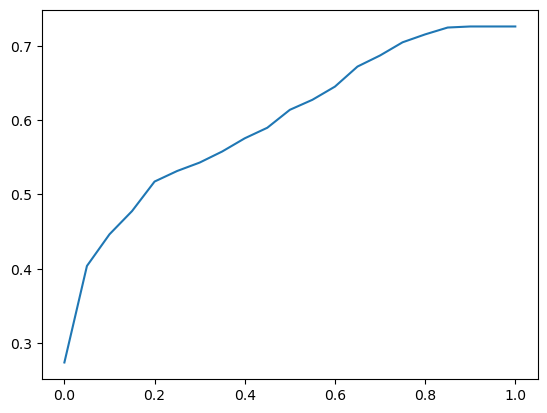

In [291]:
plt.plot(thresholds, scores)
plt.show()

In [293]:
from collections import Counter

In [299]:
Counter(y_pred >=1.0)

Counter({False: 1409})

In [301]:
Counter(y_val)

Counter({0: 1023, 1: 386})

#### Confusion Matrix

In [304]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [306]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [314]:
true_positive = (predict_positive &  actual_positive).sum()
true_negative = (actual_negative & predict_negative).sum()

false_positive = (predict_positive & actual_negative).sum()
false_negative = (predict_negative & actual_positive).sum()

(true_positive, true_negative), (false_positive, false_negative)

((83, 782), (241, 303))

In [318]:
confusion_matrix = np.array([
    [true_negative, false_positive],
    [false_negative, true_positive]
])
confusion_matrix

array([[782, 241],
       [303,  83]])

#### Precision and Recall

In [321]:
# For easy calling of the variables, we will rename
tp = true_positive
tn = true_negative
fp = false_positive
fn = false_negative

In [329]:
p = tp / (tp + fp)
p

0.25617283950617287

In [337]:
r = tp / (tp+fn)
r

0.21502590673575128